### Задача 1
Из первого уравнения системы:
$$I_S(N_S-1)=0 \Leftrightarrow N_S=1$$
Из второго уравнения:
$$J_{thr}-N_S(1+I_S)=0 \Leftrightarrow I_S=J_{thr}-1\Leftrightarrow J_{thr}=1$$
### Задача 2

Импорт необходимых библиотек

In [2]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.use('webagg')

Определение системы

In [3]:
def odes(t,y):
    I, N = y
    return [(N-1)*I,eta_g*(J-N*(1+I))]

Расчет коэффициентов

In [4]:
tau_p=20*10**(-12)
tau_c=1*10**(-9)
eta_g=tau_p/tau_c
J=4

Начальные значения и вектор времени

In [5]:
y0=(3,2)
t=np.linspace(0,500,5000)

Вызов солвера и результат

In [6]:
solution_ivp=solve_ivp(odes,t_span=[0,max(t)], t_eval=t, y0=y0, rtol=1e-8)
solution_ivp

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1358
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00020004e-01, 2.00040008e-01, ...,
       4.99799960e+02, 4.99899980e+02, 5.00000000e+02])
 t_events: None
        y: array([[3.        , 3.31418844, 3.65791735, ..., 2.99999579, 2.99999563,
        2.99999548],
       [2.        , 1.99141473, 1.98159931, ..., 0.99999949, 0.9999995 ,
        0.99999952]])
 y_events: None

Обработка результата и переход к действительному времени

In [7]:
It=solution_ivp.y[0]
Nt=solution_ivp.y[1]
t_ns=solution_ivp.t*tau_p*10**9

График

In [8]:
plt.clf()
plt.figure(1)
plt.title('Зависимость интенсивности от времени')
plt.xlabel('t, нс')
plt.ylabel('I(t), произв. ед.') 
plt.plot(t_ns, It, color='red')
plt.xlim(0,10)
plt.grid()
plt.savefig('graph1FINAL.png',dpi=600)
plt.show()

Press Ctrl+C to stop WebAgg server


RuntimeError: This event loop is already running

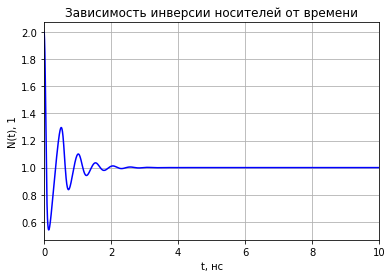

In [8]:
plt.figure(2)
plt.title('Зависимость инверсии носителей от времени')
plt.xlabel('t, нс')
plt.ylabel('N(t), 1')
plt.plot(t_ns, Nt, color='blue')
plt.xlim(0,10)
plt.grid()
plt.savefig('graph2FINAL.png',dpi=600)